Available arrays in the file: ['image', 'target', 'predict', 'meta_matrix', 'meta_target', 'structure', 'meta_structure']


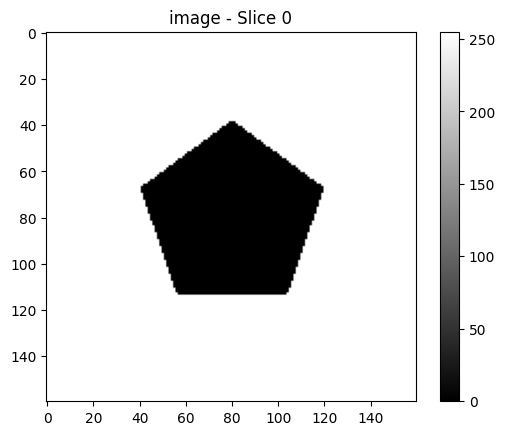

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Load the RAVEN dataset file
data_path = '/Users/andylee/Projects/raven-cvpr/output/center_single/RAVEN_0_train.npz'
data = np.load(data_path)

# Print available arrays in the file
print("Available arrays in the file:", list(data.keys()))

# Visualize a specific array
array_names = ['image', 'target', 'predict', 'meta_matrix', 'meta_target', 'structure', 'meta_structure']
array_name = 'image'  # Replace with the actual array name you want to visualize
array_data = data[array_name]

# Check if the array is 2D or 3D
if array_data.ndim == 2:
    plt.imshow(array_data, cmap='gray')
    plt.title(array_name)
    plt.colorbar()
    plt.show()
elif array_data.ndim == 3:
    # If it's a 3D array, you might want to visualize a specific slice
    slice_index = 0  # Change this to visualize different slices
    plt.imshow(array_data[slice_index], cmap='gray')
    plt.title(f"{array_name} - Slice {slice_index}")
    plt.colorbar()
    plt.show()
else:
    print(f"Array {array_name} has {array_data.ndim} dimensions, which might not be directly visualizable.")